In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
import math
import queue

## Question 01

In [4]:
cities = pd.read_csv(r"C:\Users\hp\Downloads\indian-cities-dataset (1).csv")

In [43]:
def euclidean_distance(node1, node2, pos):
    x1, y1 = pos[node1]
    x2, y2 = pos[node2]
    return math.sqrt((x2 - x1)**2 + (y2 - y1)**2)

In [41]:
def aStar(graph, start, goal, heuristic):
    visited = set()
    pri_queue = queue.PriorityQueue()  # Priority queue
    pri_queue.put((0 + heuristic[start], [start]))  # Initial state: f = g + h = 0 + heuristic

    while not pri_queue.empty():
        f, current_path = pri_queue.get()
        current_node = current_path[-1]

        if current_node == goal:
            return current_path  # Goal found

        visited.add(current_node)

        for neighbor in graph.neighbors(current_node):
            if neighbor not in visited:
                g = graph[current_node][neighbor]['weight']  # Cost from start to current node
                new_path = current_path + [neighbor]
                pri_queue.put((g + heuristic[neighbor], new_path))

    return []

### Graph Representation

In [28]:
G = nx.Graph()
G.add_weighted_edges_from(zip(cities["Origin"],cities["Destination"],cities["Distance"]))
pos = nx.spring_layout(G)

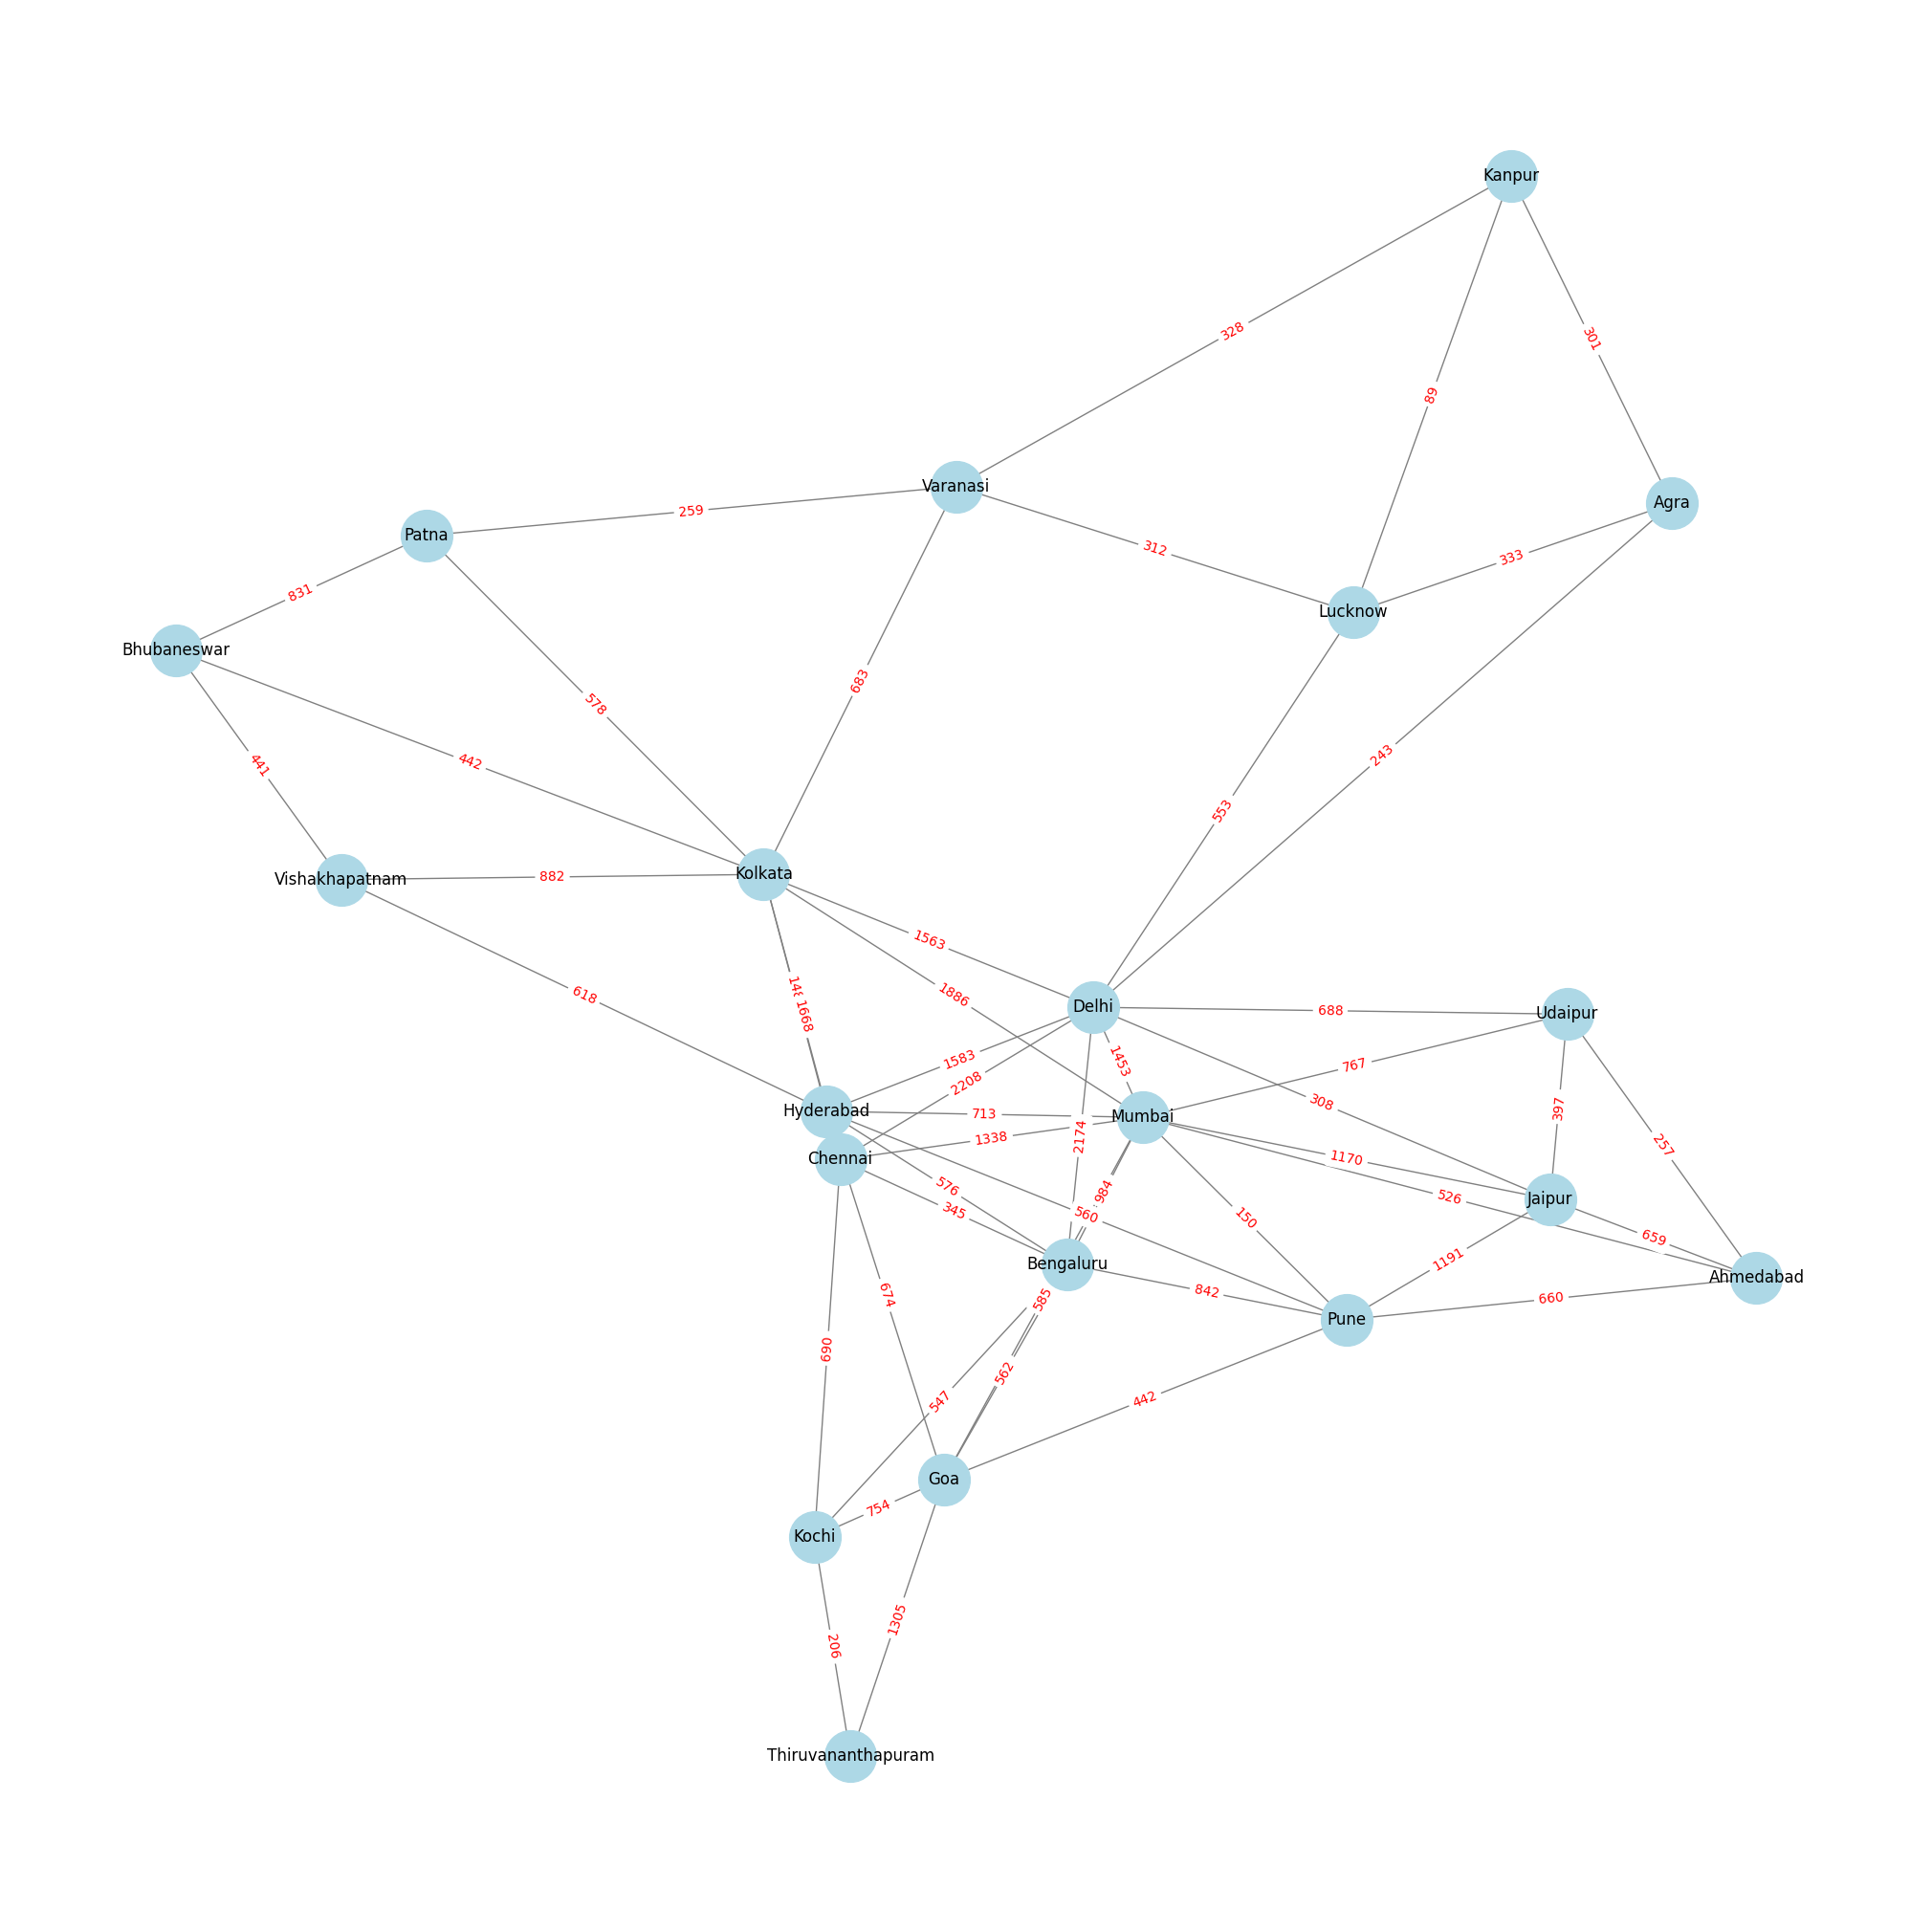

In [42]:
edge_labels = nx.get_edge_attributes(G, 'weight')
plt.figure(figsize=(20, 20))
nx.draw(G, pos, with_labels=True, node_color='lightblue', edge_color='gray', node_size=1500, font_size=12)
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=10, font_color='red')
plt.show()

### Graph Analysis

In [27]:
city1 = input(print("Enter origin city: "))
city2 = input(print("Enter destination city: "))

Enter origin city: 


None Kochi


Enter destination city: 


None Agra


In [47]:
start_node = city1
goal_node = city2

# Heuristic function using Euclidean distance
heuristic = {node: euclidean_distance(node, goal_node, pos) for node in G.nodes}

path = aStar(G, start_node, goal_node, heuristic)
if path:
    print("Path from {} to {} found: {}".format(start_node, goal_node, ' -> '.join(path)))
else:
    print("No path found from {} to {}".format(start_node, goal_node))

Path from Kochi to Agra found: Kochi -> Bengaluru -> Goa -> Pune -> Mumbai -> Ahmedabad -> Udaipur -> Jaipur -> Delhi -> Agra


In [48]:
# Get the node with the highest degree
most_connected = max(G.degree(), key=lambda x: x[1])

print(f"Most connected node: {most_connected[0]} with {most_connected[1]} connections")

Most connected node: Mumbai with 10 connections


In [61]:
lengths = []

for component in nx.connected_components(G):
    subgraph = G.subgraph(component)
    if len(subgraph) > 1:
        avg_len = nx.average_shortest_path_length(subgraph, weight='weight')
        lengths.append(avg_len)

overall_avg = sum(lengths) / len(lengths)
print(f"Average shortest path length (over connected components): {overall_avg:.2f}")

Average shortest path length (over connected components): 1567.12


### Statistical Analysis

In [59]:
cities_list = list(zip(cities["Origin"],cities["Destination"],cities["Distance"]))
shortest_connection = min(cities_list, key=lambda x: x[2])
longest_connection = max(cities_list, key=lambda x: x[2])
print(shortest_connection)
print(longest_connection)

('Lucknow', 'Kanpur', 89)
('Delhi', 'Chennai', 2208)


In [60]:
avg = cities["Distance"].mean()
med = cities["Distance"].median()
std = cities["Distance"].std()

print(f"Average distance: {avg:.2f}")
print(f"Median distance: {med:.2f}")
print(f"Standard deviation: {std:.2f}")

Average distance: 711.60
Median distance: 578.00
Standard deviation: 480.51


### Advanced Operations

In [63]:
print(nx.is_connected(G))

True


In [64]:
paths = list(nx.all_simple_paths(G, source=city1, target=city2))

for i, path in enumerate(paths, start=1):
    print(f"Path {i}: {' -> '.join(path)}")

print(f"\nTotal paths found: {len(paths)}")

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



In [65]:
adj_matrix = nx.to_pandas_adjacency(G, weight='weight')

# Display the matrix
print("Adjacency Matrix:")
print(adj_matrix)

Adjacency Matrix:
                     Agra   Delhi  Lucknow  Kanpur  Ahmedabad  Mumbai    Pune  \
Agra                  0.0   243.0    333.0   301.0        0.0     0.0     0.0   
Delhi               243.0     0.0    553.0     0.0        0.0  1453.0     0.0   
Lucknow             333.0   553.0      0.0    89.0        0.0     0.0     0.0   
Kanpur              301.0     0.0     89.0     0.0        0.0     0.0     0.0   
Ahmedabad             0.0     0.0      0.0     0.0        0.0   526.0   660.0   
Mumbai                0.0  1453.0      0.0     0.0      526.0     0.0   150.0   
Pune                  0.0     0.0      0.0     0.0      660.0   150.0     0.0   
Jaipur                0.0   308.0      0.0     0.0      659.0  1170.0  1191.0   
Udaipur               0.0   688.0      0.0     0.0      257.0   767.0     0.0   
Bengaluru             0.0  2174.0      0.0     0.0        0.0   984.0   842.0   
Hyderabad             0.0  1583.0      0.0     0.0        0.0   713.0   560.0   
Chennai   

## Question 02

In [72]:
distances = pd.Series(cities["Distance"])
distanceArr = np.array(distances)
distanceArr

array([ 240,  334,  277,  526,  663,  660,  258,  839,  576,  346,  562,
        442,  444,  831,  626,  345,  690, 1335, 1666,  307,  243,  548,
       2208, 2174, 1452, 1582,  674,  755,  585,  442, 1305,  562,  576,
        627,  674,  708, 1583, 1489,  659,  397,  308, 1170, 1191,  301,
        115,  328,  690,  547,  754,  206,  547,  680,  554,  442, 1668,
       1563,  553,  333,   89,  148,  526, 1453,  713,  984, 1886, 1338,
        256,  578,  150,  660,  560,  842,  206, 1305,  257,  397,  767,
        688,  328,  259,  683,  312,  441,  618,  882])

In [76]:
print("Mean:", distances.mean())
print("Median:", distances.median())
print("Mode:", distances.mode().iloc[0])
print(f"Standard Deviation: {distances.std():.2f}")

Mean: 711.6
Median: 578.0
Mode: 442
Standard Deviation: 480.51


In [77]:
# Sort by distance descending
top5 = cities.sort_values(by="Distance", ascending=False).head(5)

# Display top 5 city pairs with the largest distances
for idx, row in top5.iterrows():
    print(f"{row['Origin']} -> {row['Destination']}: {row['Distance']} km")

Delhi -> Chennai: 2208 km
Delhi -> Bengaluru: 2174 km
Mumbai -> Kolkata: 1886 km
Kolkata -> Chennai: 1668 km
Chennai -> Kolkata: 1666 km


### Data Visulaization

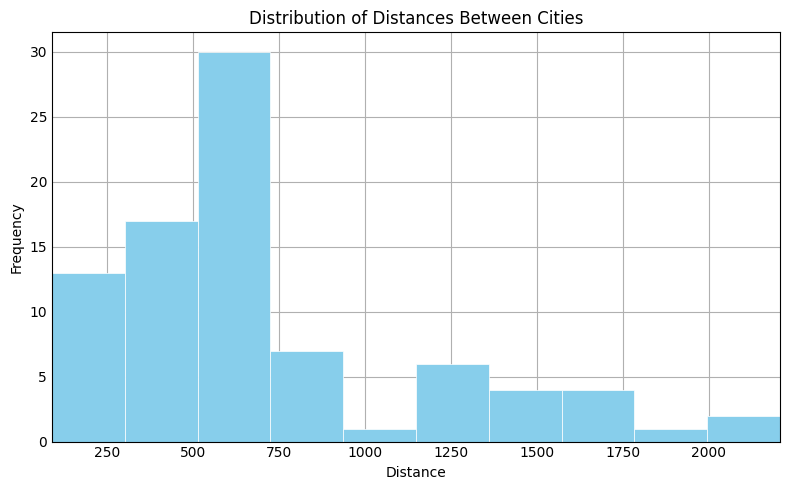

In [80]:
plt.style.use('_mpl-gallery')

x = distanceArr

fig, ax = plt.subplots(figsize=(8, 5))

# Plot histogram
ax.hist(x, bins=10, linewidth=0.5, edgecolor="white", color='skyblue')

ax.set_xlim(x.min(), x.max())
ax.set_ylim(0, None)

ax.set_xlabel("Distance")
ax.set_ylabel("Frequency")
ax.set_title("Distribution of Distances Between Cities")

plt.tight_layout()
plt.show()

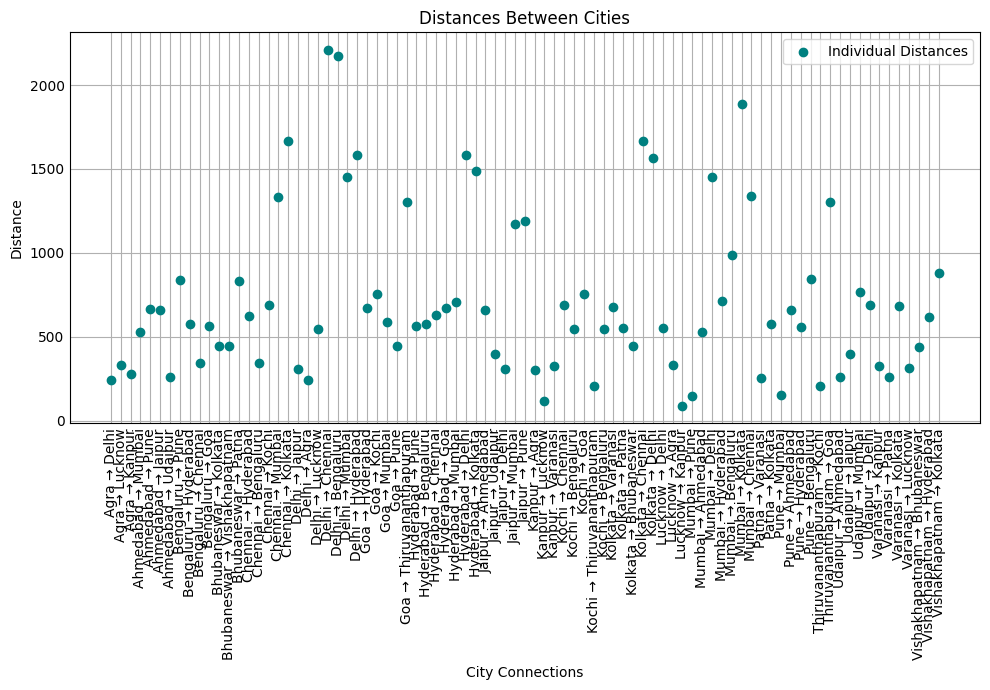

In [86]:
connection_labels = cities["Origin"] + " → " + cities["Destination"]
distances = cities["Distance"]

# Plotting
plt.figure(figsize=(10, 7))

# Scatter plot for city connections vs distance
plt.scatter(range(len(distances)), distances, color='teal', label='Individual Distances')

# Customizing the x-axis
plt.xticks(range(len(connection_labels)), connection_labels, rotation=90)
plt.xlabel("City Connections")
plt.ylabel("Distance")
plt.title("Distances Between Cities")
plt.legend()
plt.tight_layout()
plt.show()

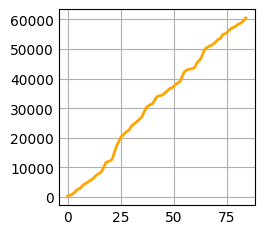

In [87]:
# Line plot for cumulative distances
cumulative_distances = distances.cumsum()
plt.plot(range(len(distances)), cumulative_distances, color='orange', linewidth=2, label='Cumulative Distance');

## Question 03

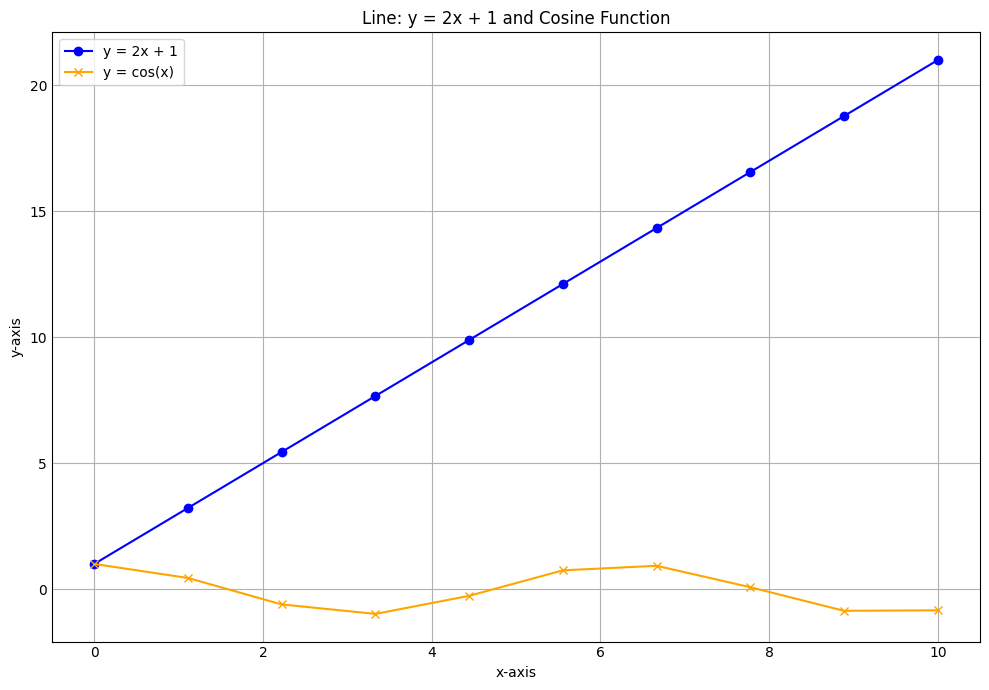

In [98]:
# x-values (shared for both lines)
x = np.linspace(0, 10, 10)

# Line 1: y = mx + c (choose m and c)
m = 2
c = 1
y_linear = m * x + c

# Line 2: y = cos(x)
y_cosine = np.cos(x)

plt.figure(figsize=(10,7))
# Plotting both lines with markers
plt.plot(x, y_linear, marker='o', label='y = 2x + 1', linestyle='-', color='blue')
plt.plot(x, y_cosine, marker='x', label='y = cos(x)', linestyle='-', color='orange')

# Labels and title
plt.xlabel("x-axis")
plt.ylabel("y-axis")
plt.title("Line: y = 2x + 1 and Cosine Function")
plt.legend()

plt.grid(True)
plt.tight_layout()
plt.show()